In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch
from mplsoccer import Radar , FontManager, PyPizza, add_image
from highlight_text import fig_text


In [2]:
df = pd.read_csv('Untitled spreadsheet - Sheet1.csv')
df.head()

,Statistic,Per 90,Percentile
0,Goals,0.87,96.0
1,Assists,0.11,41.0
2,Non-Penalty Goals,0.66,91.0
3,Penalty Kicks Made,0.21,94.0
4,Penalty Kicks Attempted,0.26,95.0


In [3]:
df['Statistic'].values


array(['Goals', 'Assists', 'Non-Penalty Goals', 'Penalty Kicks Made',
       'Penalty Kicks Attempted', 'Yellow Cards', 'Red Cards', nan, 'xG',
       'npxG', 'xA', 'npxG+xA', 'Goals', 'Shots Total', 'Shots on target',
       'Shots on target %', 'Goals/Shot', 'Goals/Shot on target',
       'Average Shot Distance', 'Shots from free kicks',
       'Penalty Kicks Made', 'Penalty Kicks Attempted', nan, 'xG', 'npxG',
       'npxG/Sh', 'Goals - xG', 'Non-Penalty Goals - npxG',
       'Passes Completed', 'Passes Attempted', 'Pass Completion %',
       'Total Passing Distance', 'Progressive Passing Distance', nan,
       'Passes Completed (Short)', 'Passes Attempted (Short)',
       'Pass Completion % (Short)', nan, 'Passes Completed (Medium)',
       'Passes Attempted (Medium)', 'Pass Completion % (Medium)', nan,
       'Passes Completed (Long)', 'Passes Attempted (Long)',
       'Pass Completion % (Long)', 'Assists', 'xA', 'Key Passes',
       'Passes into Final Third', 'Passes into Penalty

In [4]:
params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          "Dribbles Completed", "Interceptions", "Touches"]


In [5]:
df['Statistic'].isin(params)

0      False
1      False
2       True
3      False
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Name: Statistic, Length: 171, dtype: bool

In [6]:
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5]

In [7]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*11,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [8]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [9]:
#df = df.drop( 'Percentile' , axis = 1)

In [10]:
df[df['Statistic'].isin(params)]

,Statistic,Per 90,Percentile
2,Non-Penalty Goals,0.66,91.0
9,npxG,0.62,96.0
10,xA,0.1,37.0
24,npxG,0.62,96.0
46,xA,0.1,37.0
47,Key Passes,1.08,66.0
51,Progressive Passes,2.38,78.0
57,Through Balls,0.08,52.0
82,Shot-Creating Actions,3.68,94.0
91,Goal-Creating Actions,0.56,82.0


In [11]:
#params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          #"Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          #"Dribbles Completed", "Pressure Regains", "Touches In Box"]

values = [.62 , .66 , .1 , 1.08 , .08 , 2.38 , 3.68 , .56 , 1.75 , .26 , 46.85]
values1 = [96 , 91 , 37 , 66 , 52 , 78 , 94 , 82 , 84 , 31 , 86]

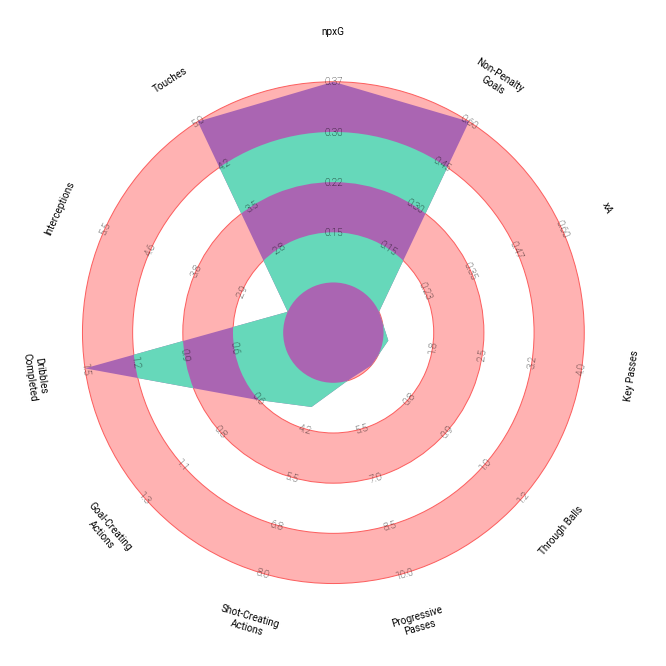

In [12]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

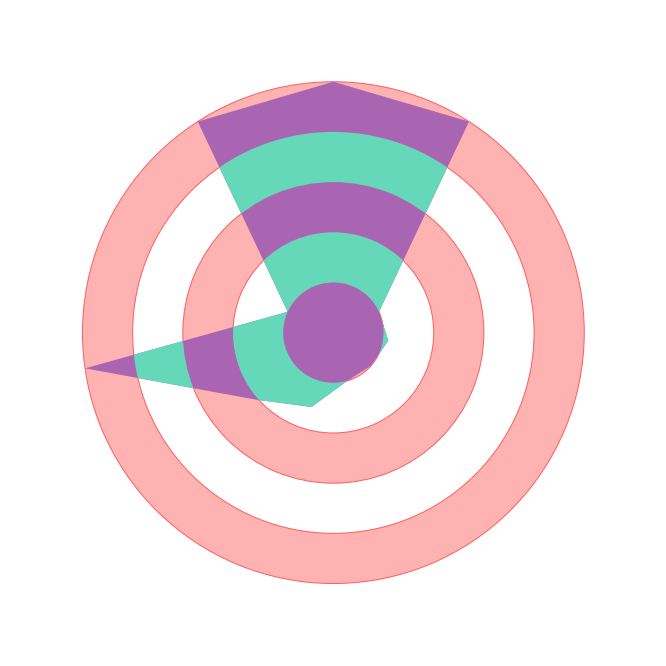

In [13]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output

def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    """ Create a Radar chart flanked by a title and endnote axes.

    Parameters
    ----------
    radar_height: float, default 0.915
        The height of the radar axes in fractions of the figure height (default 91.5%).
    title_height: float, default 0.06
        The height of the title axes in fractions of the figure height (default 6%).
    figheight: float, default 14
        The figure height in inches.

    Returns
    -------
    fig : matplotlib.figure.Figure
    axs : dict[label, Axes]
    """
        
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

# creating the figure using the function defined above:
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_regular.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: Mostafa Hamdy',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Cristiano Ronaldo', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Juventus', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='left', va='center', color='#cc2a3f')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Forward', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='right', va='center', color='#cc2a3f')

fig.set_facecolor('#121212')

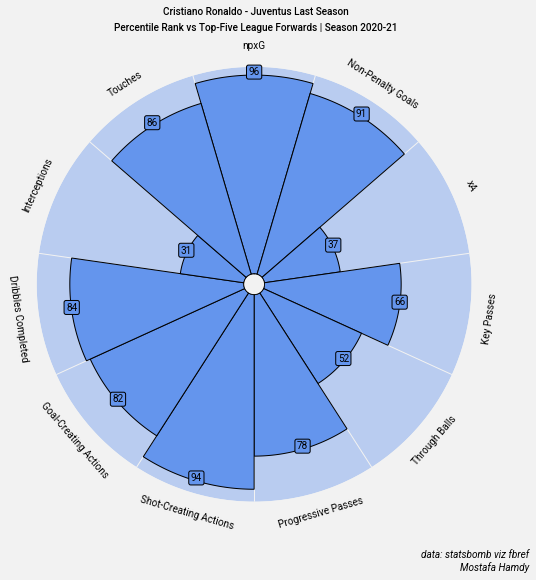

In [14]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#F2F2F2",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
                # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values1,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,         
    
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Cristiano Ronaldo - Juventus Last Season", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Forwards | Season 2020-21",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "Mostafa Hamdy"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()

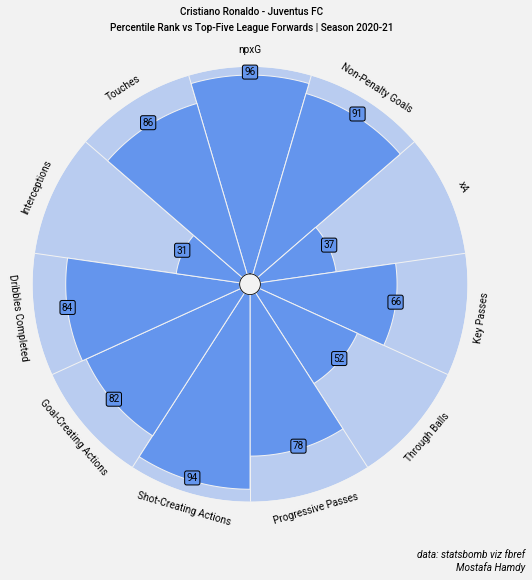

In [15]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#F2F2F2",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values1,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#F2F2F2",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Cristiano Ronaldo - Juventus FC", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Forwards | Season 2020-21",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "Mostafa Hamdy"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.savefig(r'C:\Users\mosta\Downloads\Cristiano_Ronaldo.png' , dpi = 300)
plt.show()



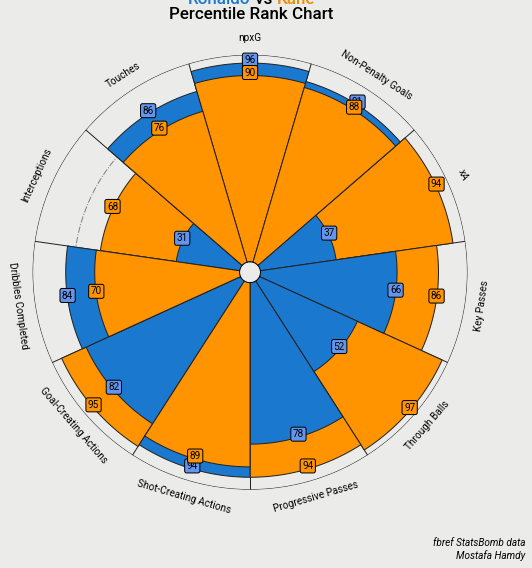

In [26]:
values2 = [90 , 88 , 94 , 86 , 97, 94 , 89 , 95 , 70 , 68 , 76]

# pass True in that parameter-index whose values are to be adjusted
# here True values are passed for "\nTouches\nper Turnover" and "pAdj\nPress Regains" params
params_offset = [
    False, False, False, False, False, False,
    False, False, False, False, False
]

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values1,                     # list of values
    compare_values=values2,    # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)


# adjust text for comparison-values-text
baker.adjust_texts(params_offset, offset=-0.17, adj_comp_values=True)

# add title
fig_text(
    0.515, 0.99, "<Ronaldo> vs <Kane>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank Chart",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "fbref StatsBomb data"
CREDIT_2 = "Mostafa Hamdy"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)
plt.savefig(r'C:\Users\mosta\Downloads\Ronaldo vs Kane.png' , dpi =300)
plt.show()